# Linear Regression

In [2]:
%matplotlib inline
import torch 
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

In [11]:
# data preparation
num_inputs = 2
num_examples = 100
true_w = [2, -3.4]
true_b = 4.2
features = torch.from_numpy(np.random.normal(0, 1, (num_examples, num_inputs)))
labels = true_w[0] * features[:,0] + true_w[1] * features[:,1] + true_b
# add noise
labels += torch.from_numpy(np.random.normal(0, 0.01, size = labels.size()))

In [14]:
def user_svg_display():
    display.set_matplotlib_formats('svg')

In [16]:
def set_figsize(figsize = (3.5, 2.5)):
    user_svg_display()
    plt.rcParams['figure.figsize'] = figsize

In [17]:
set_figsize()

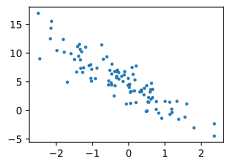

In [19]:
plt.scatter(features[:,1].numpy(), labels.numpy(), 5)

In [40]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i:min(i+batch_size, num_examples)])
        yield features.index_select(0, j), labels.index_select(0, j)

In [42]:
# get a bach
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

tensor([[ 0.1084, -1.0483],
        [-0.4565,  0.5294],
        [-0.6753, -1.3217],
        [-0.0356, -1.7803],
        [-0.9351, -1.2692],
        [-1.3632,  0.4841],
        [-0.3197,  2.3594],
        [ 1.4331, -2.1446],
        [-0.0397,  0.5481],
        [ 1.3430, -1.3618]], dtype=torch.float64) tensor([ 7.9638,  1.4791,  7.3410, 10.1717,  6.6410, -0.1752, -4.4843, 14.3546,
         2.2480, 11.5183], dtype=torch.float64)


In [65]:
# initialize parameters
w  = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype = torch.float64)
b = torch.zeros(1, dtype = torch.float)
w.requires_grad_(requires_grad = True)
b.requires_grad_(requires_grad = True)

tensor([0.], requires_grad=True)

In [80]:
# Model
def linreg(X, w, b):
    return torch.mm(X, w) + b

In [81]:
# Loss Function
def squred_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

In [85]:
# Optimizer
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size

In [86]:
# Train
lr = 0.03
num_epochs = 3
net = linreg
loss = squred_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()
        l.backward()
        sgd([w, b], lr, batch_size)
        
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f ' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.742367 
epoch 2, loss 0.434532 
epoch 3, loss 0.257425 
